<a href="https://colab.research.google.com/github/erika0915/fake-news-detection/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler


# 경로설정
common_path = "/content/drive/MyDrive/기학_프로젝트/embedding/"

train_data = pd.read_csv(common_path + "embedded_0.5_newsdata_train.csv")
test_data = pd.read_csv(common_path + "embedded_0.5_newsdata_test.csv")

# 데이터 확인
print(train_data.head())

          newsId                                          newsTitle  \
0  EC_M04_012926  [-0.21435882151126862, -0.02270747721195221, -...   
1  GB_M11_046746  [0.07608353346586227, -0.23757438361644745, 0....   
2  EC_M04_015193  [-0.22448797523975372, -0.07815763354301453, 0...   
3  IS_M10_347814  [0.012387831695377827, -0.1686076670885086, 0....   
4  EC_M04_013975  [0.009901121258735657, -0.036488283425569534, ...   

                                         newsContent  useType processLevel  \
0  [-0.21273910999298096, -0.05456920713186264, 0...        0            하   
1  [0.014670244418084621, -0.08828648924827576, 0...        0            하   
2  [-0.16639891266822815, -0.04754455387592316, 0...        0            하   
3  [-0.08013288676738739, -0.1144118532538414, 0....        1            하   
4  [-0.13610363006591797, -0.038023144006729126, ...        0            하   

   processPattern  
0               0  
1               0  
2               0  
3               0  
4   

In [ ]:
# NaN 값을 빈 배열로 처리하고, newsContent와 newsTitle의 벡터를 합쳐서 total에 저장
train_data['total'] = train_data['newsContent'].apply(lambda x: np.array(ast.literal_eval(x)) if pd.notna(x) else np.zeros(150)) + \
                       train_data['newsTitle'].apply(lambda x: np.array(ast.literal_eval(x)) if pd.notna(x) else np.zeros(150))

test_data['total'] = test_data['newsContent'].apply(lambda x: np.array(ast.literal_eval(x)) if pd.notna(x) else np.zeros(150)) + \
                      test_data['newsTitle'].apply(lambda x: np.array(ast.literal_eval(x)) if pd.notna(x) else np.zeros(150))

# 결과 확인
print(train_data.head())
print(test_data.head())

          newsId                                          newsTitle  \
0  EC_M04_012926  [-0.21435882151126862, -0.02270747721195221, -...   
1  GB_M11_046746  [0.07608353346586227, -0.23757438361644745, 0....   
2  EC_M04_015193  [-0.22448797523975372, -0.07815763354301453, 0...   
3  IS_M10_347814  [0.012387831695377827, -0.1686076670885086, 0....   
4  EC_M04_013975  [0.009901121258735657, -0.036488283425569534, ...   

                                         newsContent  useType processLevel  \
0  [-0.21273910999298096, -0.05456920713186264, 0...        0            하   
1  [0.014670244418084621, -0.08828648924827576, 0...        0            하   
2  [-0.16639891266822815, -0.04754455387592316, 0...        0            하   
3  [-0.08013288676738739, -0.1144118532538414, 0....        1            하   
4  [-0.13610363006591797, -0.038023144006729126, ...        0            하   

   processPattern                                              total  
0               0  [-0.4270979315

In [ ]:
# 1. X_train, X_test 준비
X_train = np.array(train_data['total'].tolist())
X_test = np.array(test_data['total'].tolist())

# 2. 타겟 라벨 준비
y_train = train_data["useType"]
y_test = test_data["useType"]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#3. SVM 모델 설정
model = SVC(kernel='rbf', class_weight='balanced')

# 4. 모델 학습
model.fit(X_train, y_train)

# 5. 예측
y_pred = model.predict(X_test)

# 6. 결과 평가
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.775769077107471
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79     15566
           1       0.78      0.74      0.76     14470

    accuracy                           0.78     30036
   macro avg       0.78      0.77      0.77     30036
weighted avg       0.78      0.78      0.78     30036



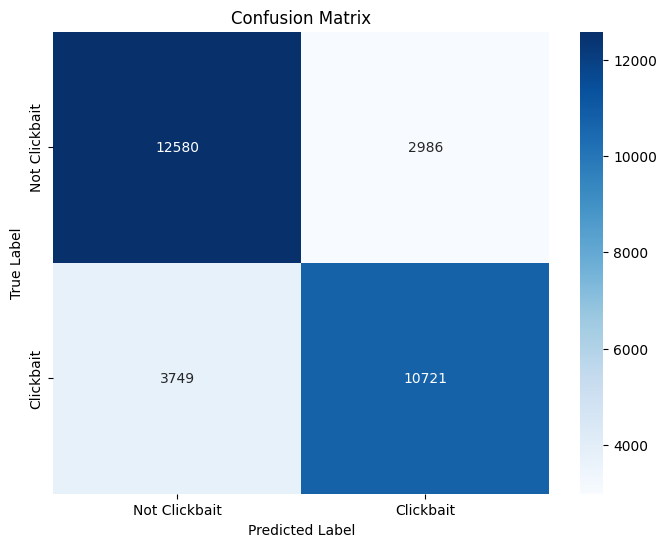

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Clickbait", "Clickbait"], yticklabels=["Not Clickbait", "Clickbait"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
